# Importing Required Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Reading CSV

In [2]:
data = pd.read_csv("titanic.csv")
print("First few rows of the dataset : ")
data.head()

First few rows of the dataset : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Summary Statistics

In [4]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Checking Missing Values

In [5]:
print("Missing Values : ")
print(data.isnull().sum())

Missing Values : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Visualizing Missing Data

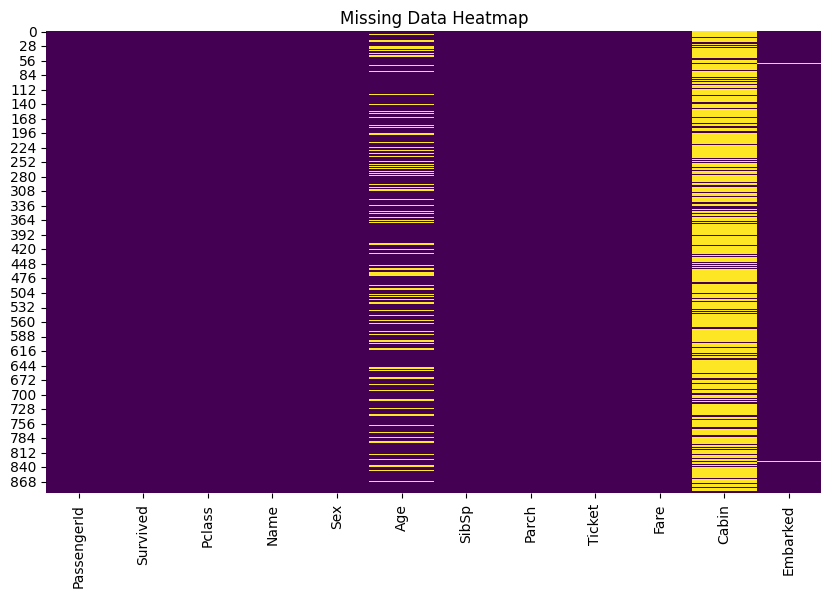

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Distribution Polls for Numerical features


Distribution Plots for Numerical Features:


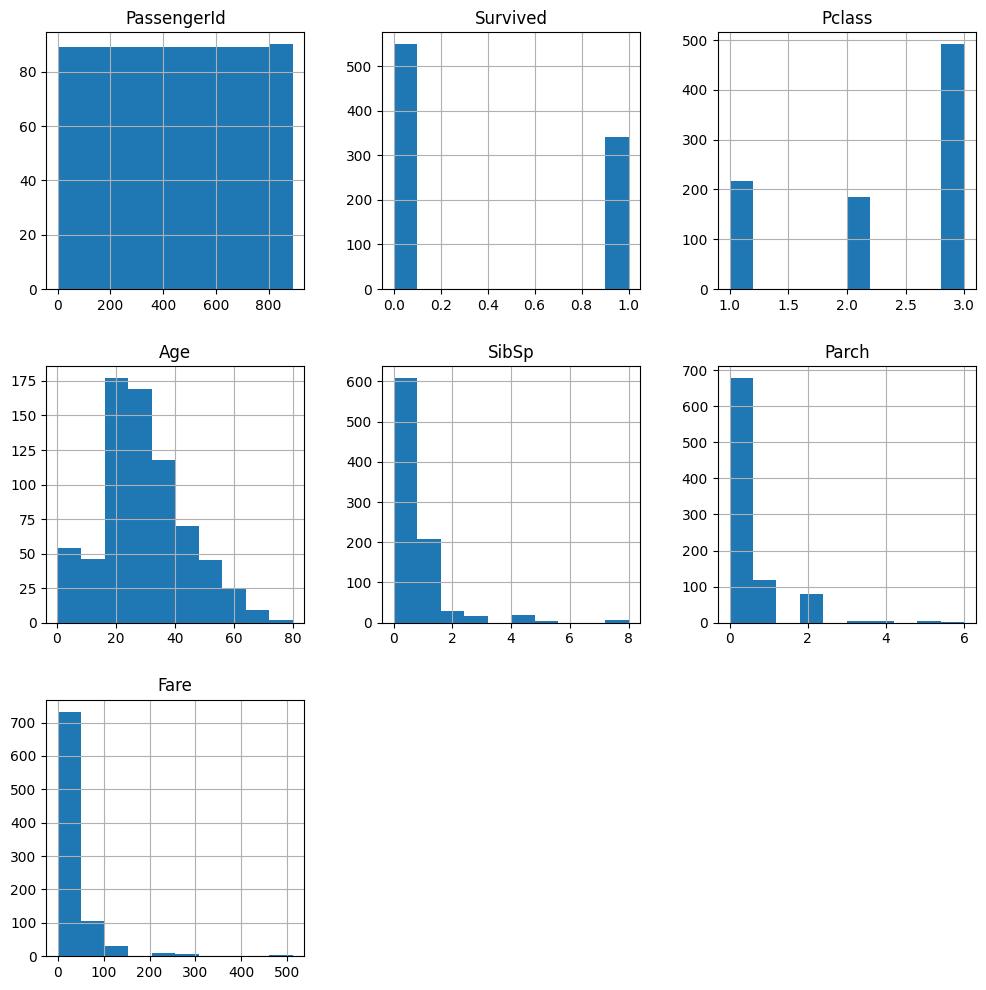

In [7]:
print("\nDistribution Plots for Numerical Features:")
data.hist(figsize=(12, 12))
plt.show()

## Box plots for numerical features to identify outliers

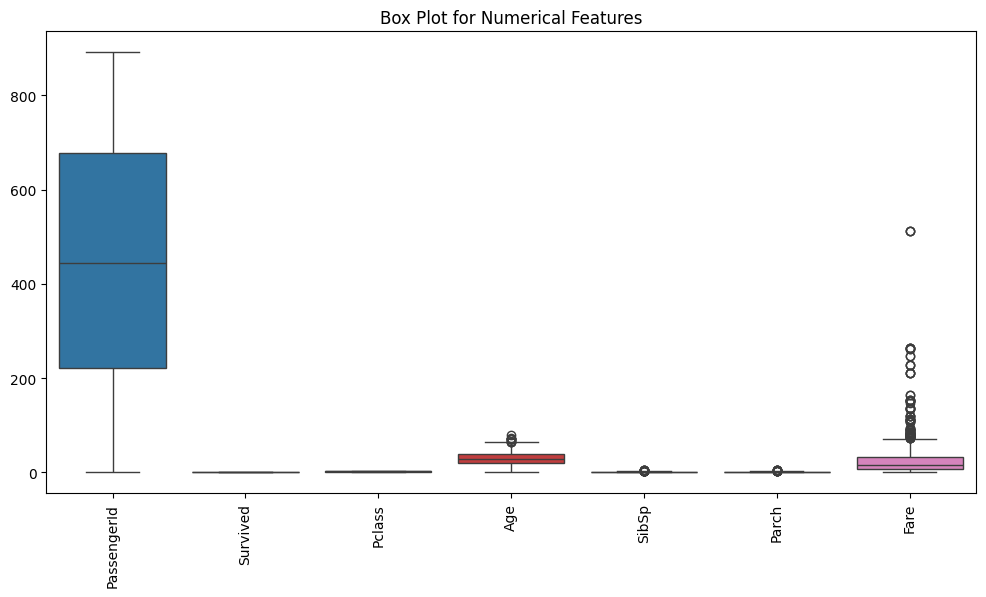

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']).dropna())
plt.xticks(rotation=90)
plt.title('Box Plot for Numerical Features')
plt.show()

## Count plot for Pclass

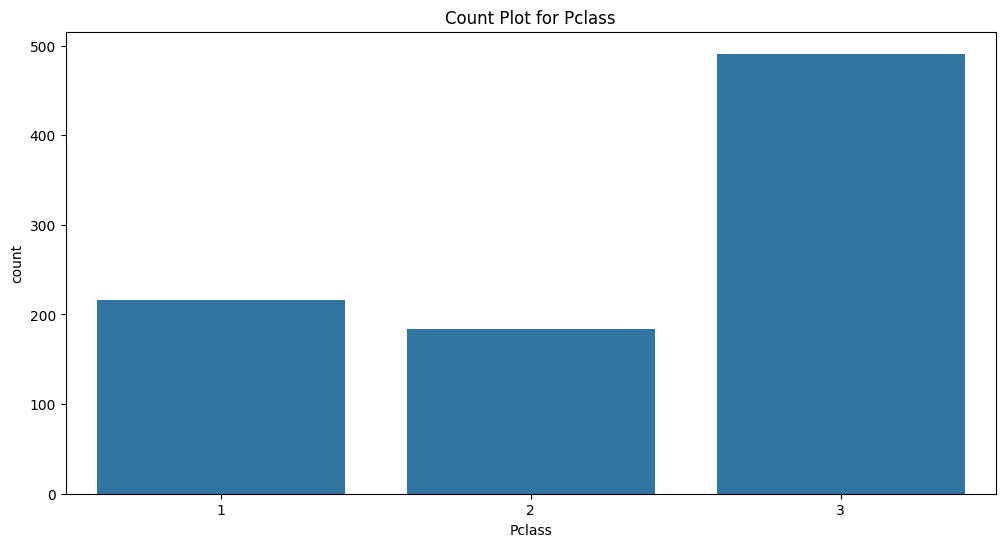

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Count Plot for Pclass')
plt.show()

## Count plot for Sex

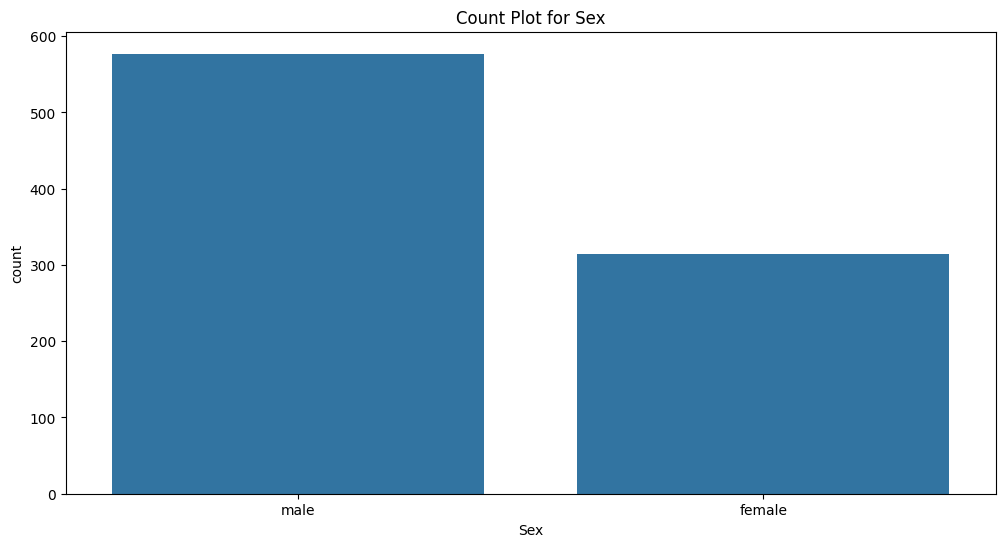

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=data)
plt.title('Count Plot for Sex')
plt.show()

## Count plot for Embarked

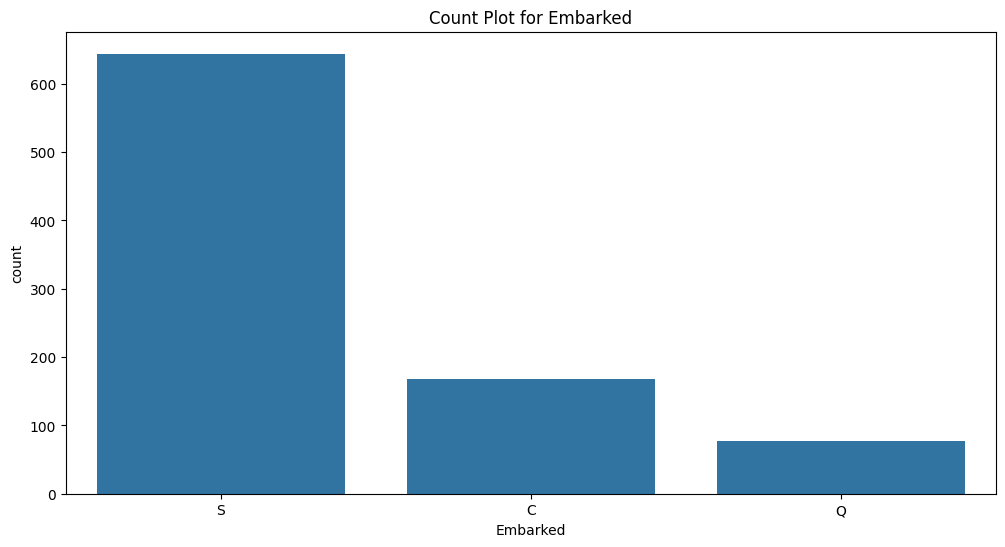

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', data=data)
plt.title('Count Plot for Embarked')
plt.show()

## Survival rate by Pclass

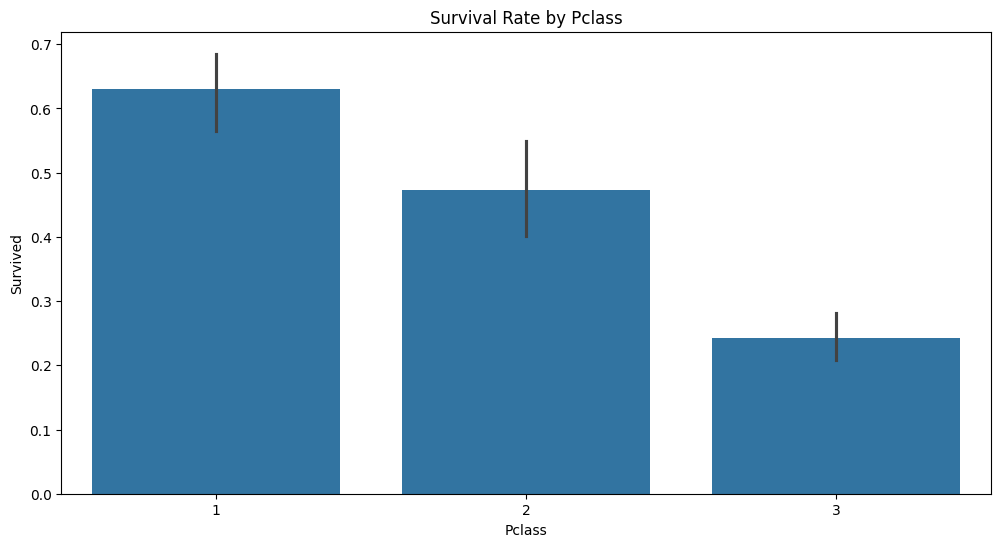

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.show()

## Survival rate by Sex

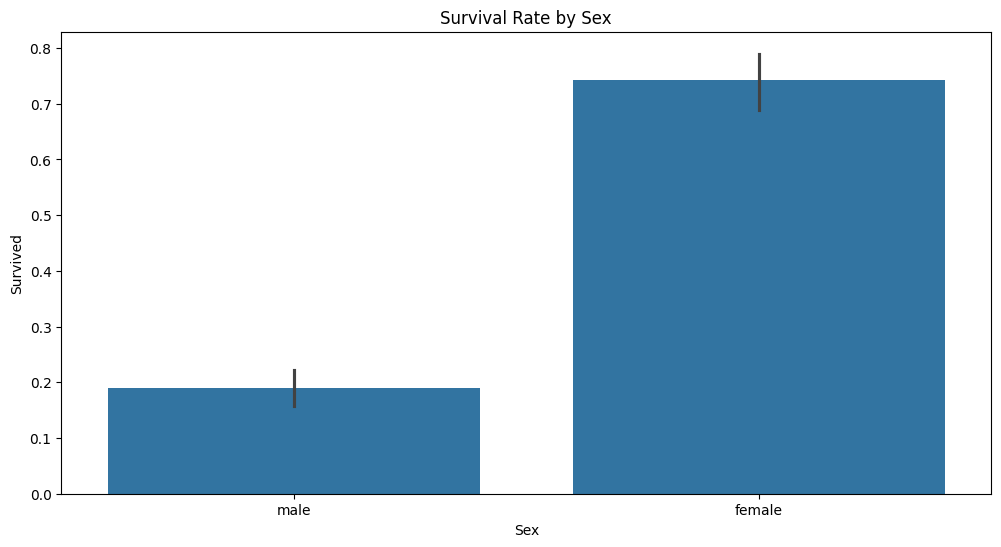

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

## Survival rate by Embarked

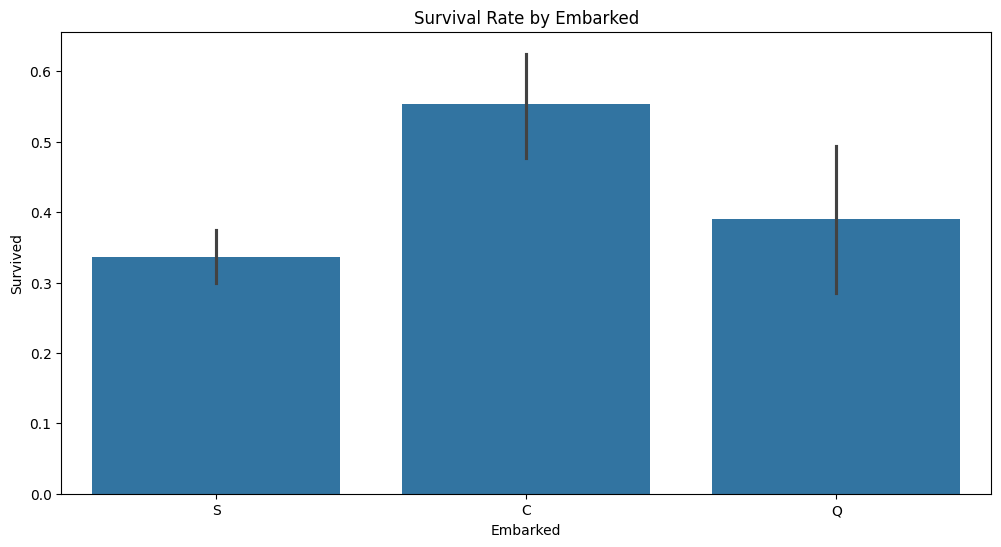

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.show()

## Pairplot for selected features

C:\Users\MR.H.BALAJEE\.conda\envs\AIML1\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


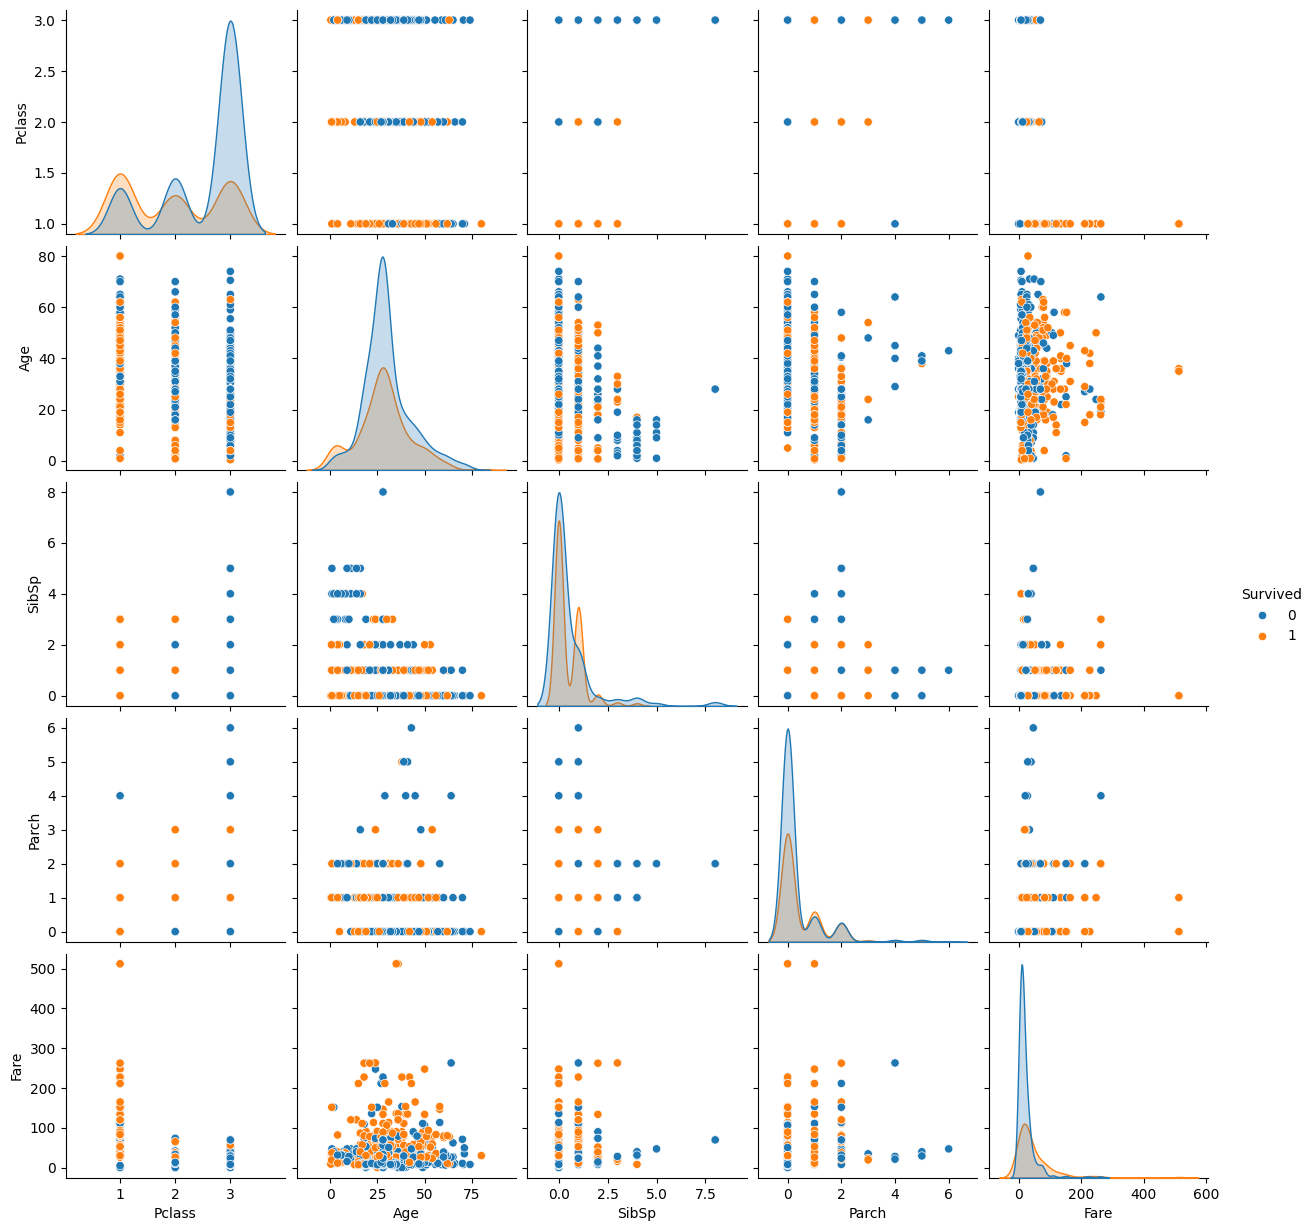

In [29]:
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
pairplot_data = data[selected_features].dropna()
pairplot_fig = sns.pairplot(pairplot_data, hue='Survived')
plt.show()

# Data Cleaning

## Droping Unneccesary Columns

In [25]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [26]:
print(data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]


## Handling Missing Values

In [27]:
# For 'Age' column, fill missing values with the median age
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# For 'Embarked' column, fill missing values with the mode (most frequent value)
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

# Saving the Cleaned Dataset

In [30]:
data.to_csv('cleaned_titanic_dataset.csv', index=False)